In [17]:
library(lme4)
library(ggplot2)
library(here)
library(tidyverse)
library(mixedup)
library(kableExtra)


Attaching package: ‘kableExtra’


The following object is masked from ‘package:dplyr’:

    group_rows




In [18]:
kable_df <- function(data, digits=3, ...) {
  kableExtra::kable(
    data,
    digits = digits,
    format = 'html',
    booktabs = T,
    # longtable = F,
    linesep = "", 
    ...,
  ) %>% 
    kableExtra::kable_styling(full_width = F)
}

In [2]:
library(showtext)

font_add_google("Lato", "lato")
showtext_opts(dpi = 300)
showtext_auto()


Loading required package: sysfonts

Loading required package: showtextdb



In [3]:
library(repr)
options(repr.plot.width=15, repr.plot.height=12)

In [4]:
data_location <- "data"
gpa_file <- "gpa.csv"
gpa_data <- read_csv(here(data_location, gpa_file))

Rows: 1200 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): occas, job, sex, admitted
dbl (6): student, gpa, highgpa, year, semester, occasion

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Warning message in grid.Call.graphics(C_lines, x$x, x$y, index, x$arrow):
“semi-transparency is not supported on this device: reported only once per page”


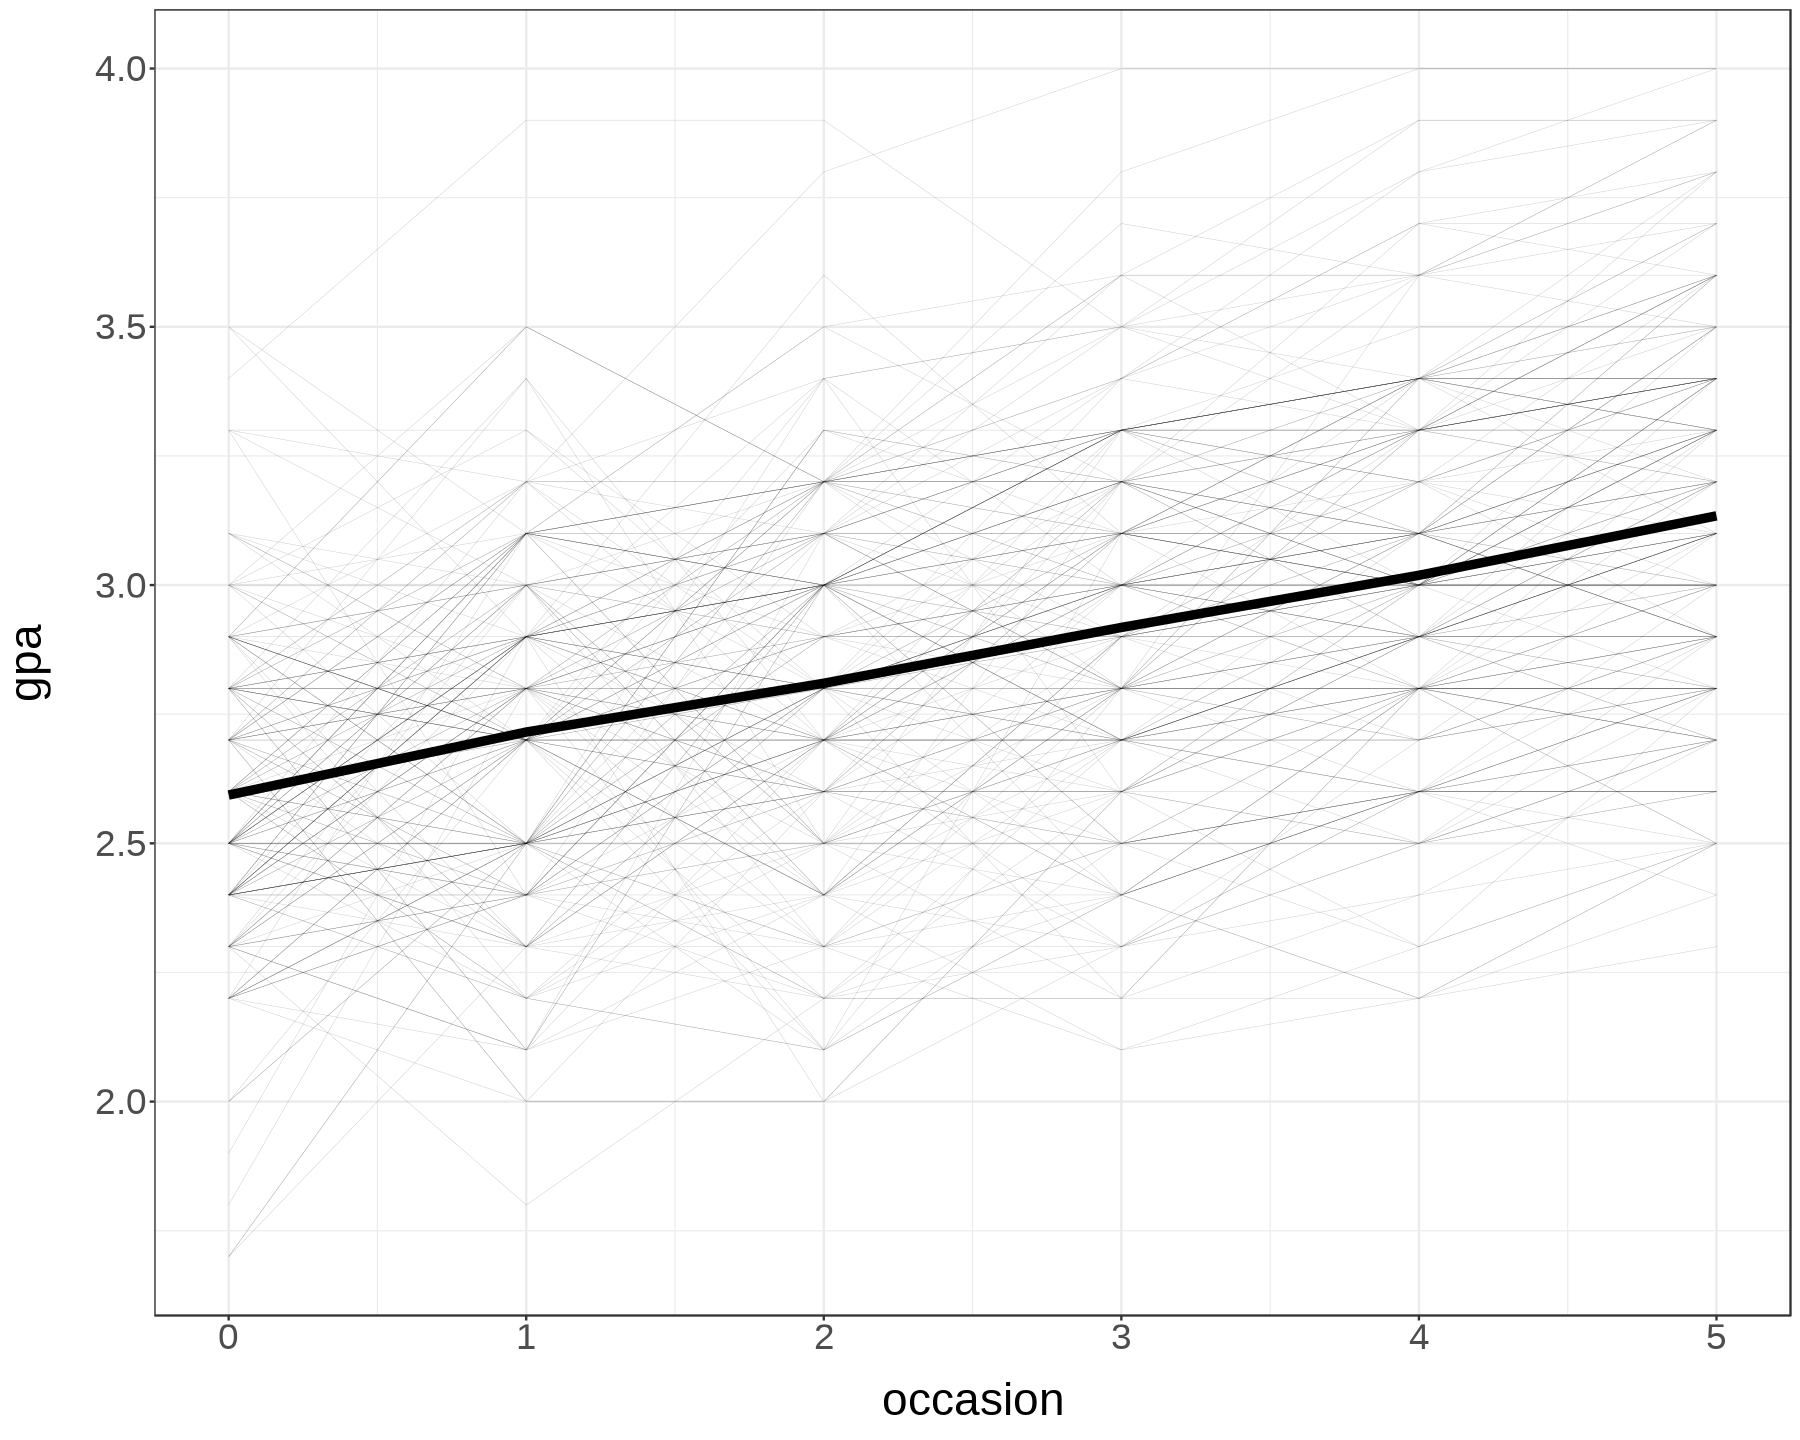

In [5]:
gpa_data %>% ggplot(aes(x = occasion, y = gpa)) +
    geom_line(aes(group = student), linewidth = 0.1, alpha = 0.2) +
    stat_summary(fun = mean, geom = "line", linewidth = 2) +
    theme_bw()

In [6]:
gpa_lm <- gpa_data %>% lm(gpa ~ occasion, data = .)
summary(gpa_lm)




Call:
lm(formula = gpa ~ occasion, data = .)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.90553 -0.22447 -0.01184  0.26921  1.19447 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.599214   0.017846  145.65   <2e-16 ***
occasion    0.106314   0.005894   18.04   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3487 on 1198 degrees of freedom
Multiple R-squared:  0.2136,	Adjusted R-squared:  0.2129 
F-statistic: 325.3 on 1 and 1198 DF,  p-value: < 2.2e-16


In [30]:
pander::pander(summary(gpa_lm), round = 3) %>%
  toString() %>%
  IRdisplay::display_markdown()



|     &nbsp;      | Estimate | Std. Error | t value | Pr(>|t|) |
|:---------------:|:--------:|:----------:|:-------:|:--------:|
| **(Intercept)** |  2.599   |   0.018    |  145.7  |    0     |
|  **occasion**   |  0.106   |   0.006    |  18.04  |    0     |



| Observations | Residual Std. Error | $R^2$  | Adjusted $R^2$ |
|:------------:|:-------------------:|:------:|:--------------:|
|     1200     |       0.3487        | 0.2136 |     0.2129     |

Table: Fitting linear model: gpa ~ occasion



In [8]:
library(lme4)
gpa_mixed <- lmer(gpa ~ occasion + (1 | student), data = gpa_data)
summary(gpa_mixed)

Linear mixed model fit by REML ['lmerMod']
Formula: gpa ~ occasion + (1 | student)
   Data: gpa_data

REML criterion at convergence: 408.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.6169 -0.6373 -0.0004  0.6361  2.8310 

Random effects:
 Groups   Name        Variance Std.Dev.
 student  (Intercept) 0.06372  0.2524  
 Residual             0.05809  0.2410  
Number of obs: 1200, groups:  student, 200

Fixed effects:
            Estimate Std. Error t value
(Intercept) 2.599214   0.021696   119.8
occasion    0.106314   0.004074    26.1

Correlation of Fixed Effects:
         (Intr)
occasion -0.469

In [32]:
vcovs <- extract_vc(gpa_mixed, ci_level = 0) %>%
  select(variance)

extract_fixed_effects(gpa_mixed) %>%
  kable_df() %>% 
  toString() %>% 
  IRdisplay::display_html()

extract_vc(gpa_mixed, ci_level = 0) %>%
  select(-var_prop) %>%
  kable_df() %>%
  toString() %>% 
  IRdisplay::display_html()



term,value,se,t,p_value,lower_2.5,upper_97.5
Intercept,2.599,0.022,119.800,0,2.557,2.642
occasion,0.106,0.004,26.096,0,0.098,0.114


group,effect,variance,sd
student,Intercept,0.064,0.252
Residual,NA,0.058,0.241


`lmer` does not provide p values! The main reason is that mixed models are essentially dealing with different sample sizes, the $N_c$ within clusters, which may vary cluster to cluster (and even be a single observation!), and $N$ total observations, which puts us in kind of a fuzzy situation with regard to reference distributions, denominator degrees of freedom, and how to approximate a 'best' solution. Hence, those approximations may be very poor in some scenarios, or make assumptions that may not be appropriate for the situation.

*Note that many common modeling situations involve a fuzzy p setting, but especially penalized regression approaches such as mixed, additive, ridge regression models etc. Rather than be a bad thing, this usually is a sign you’re doing something interesting, or handling complexity in an appropriate way.*

In [34]:
confint(gpa_mixed)

extract_vc(gpa_mixed) %>%
  kable_df(align = 'lrr', digits = 3) %>%
  toString() %>%
  IRdisplay::display_html()

Computing profile confidence intervals ...



,2.5 %,97.5 %
.sig01,0.22517423,0.2824604
.sigma,0.23071113,0.2518510
(Intercept),2.55665145,2.6417771
occasion,0.09832589,0.1143027


Computing profile confidence intervals ...



group,effect,variance,sd,sd_2.5,sd_97.5,var_prop
student,Intercept,0.064,0.252,0.225,0.282,0.523
Residual,NA,0.058,0.241,0.231,0.252,0.477


In [37]:
# Random Effect --> Random Intercept
extract_random_effects(gpa_mixed) %>% 
  head(5) %>% 
  kable_df(align = 'r') %>%
  toString() %>%
  IRdisplay::display_html()

group_var,effect,group,value,se,lower_2.5,upper_97.5
student,Intercept,1,-0.071,0.092,-0.251,0.109
student,Intercept,2,-0.216,0.092,-0.395,-0.036
student,Intercept,3,0.088,0.092,-0.091,0.268
student,Intercept,4,-0.187,0.092,-0.366,-0.007
student,Intercept,5,0.030,0.092,-0.149,0.210


In [38]:
# Intercept + Random Intercept
extract_random_coefs(gpa_mixed) %>% 
  head(5) %>% 
  kable_df(align = 'rr') %>%
  toString() %>%
  IRdisplay::display_html()


group_var,effect,group,value,se,lower_2.5,upper_97.5
student,Intercept,1,2.528,0.095,2.343,2.713
student,Intercept,2,2.383,0.095,2.198,2.568
student,Intercept,3,2.687,0.095,2.502,2.872
student,Intercept,4,2.412,0.095,2.227,2.597
student,Intercept,5,2.629,0.095,2.444,2.814


Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“semi-transparency is not supported on this device: reported only once per page”


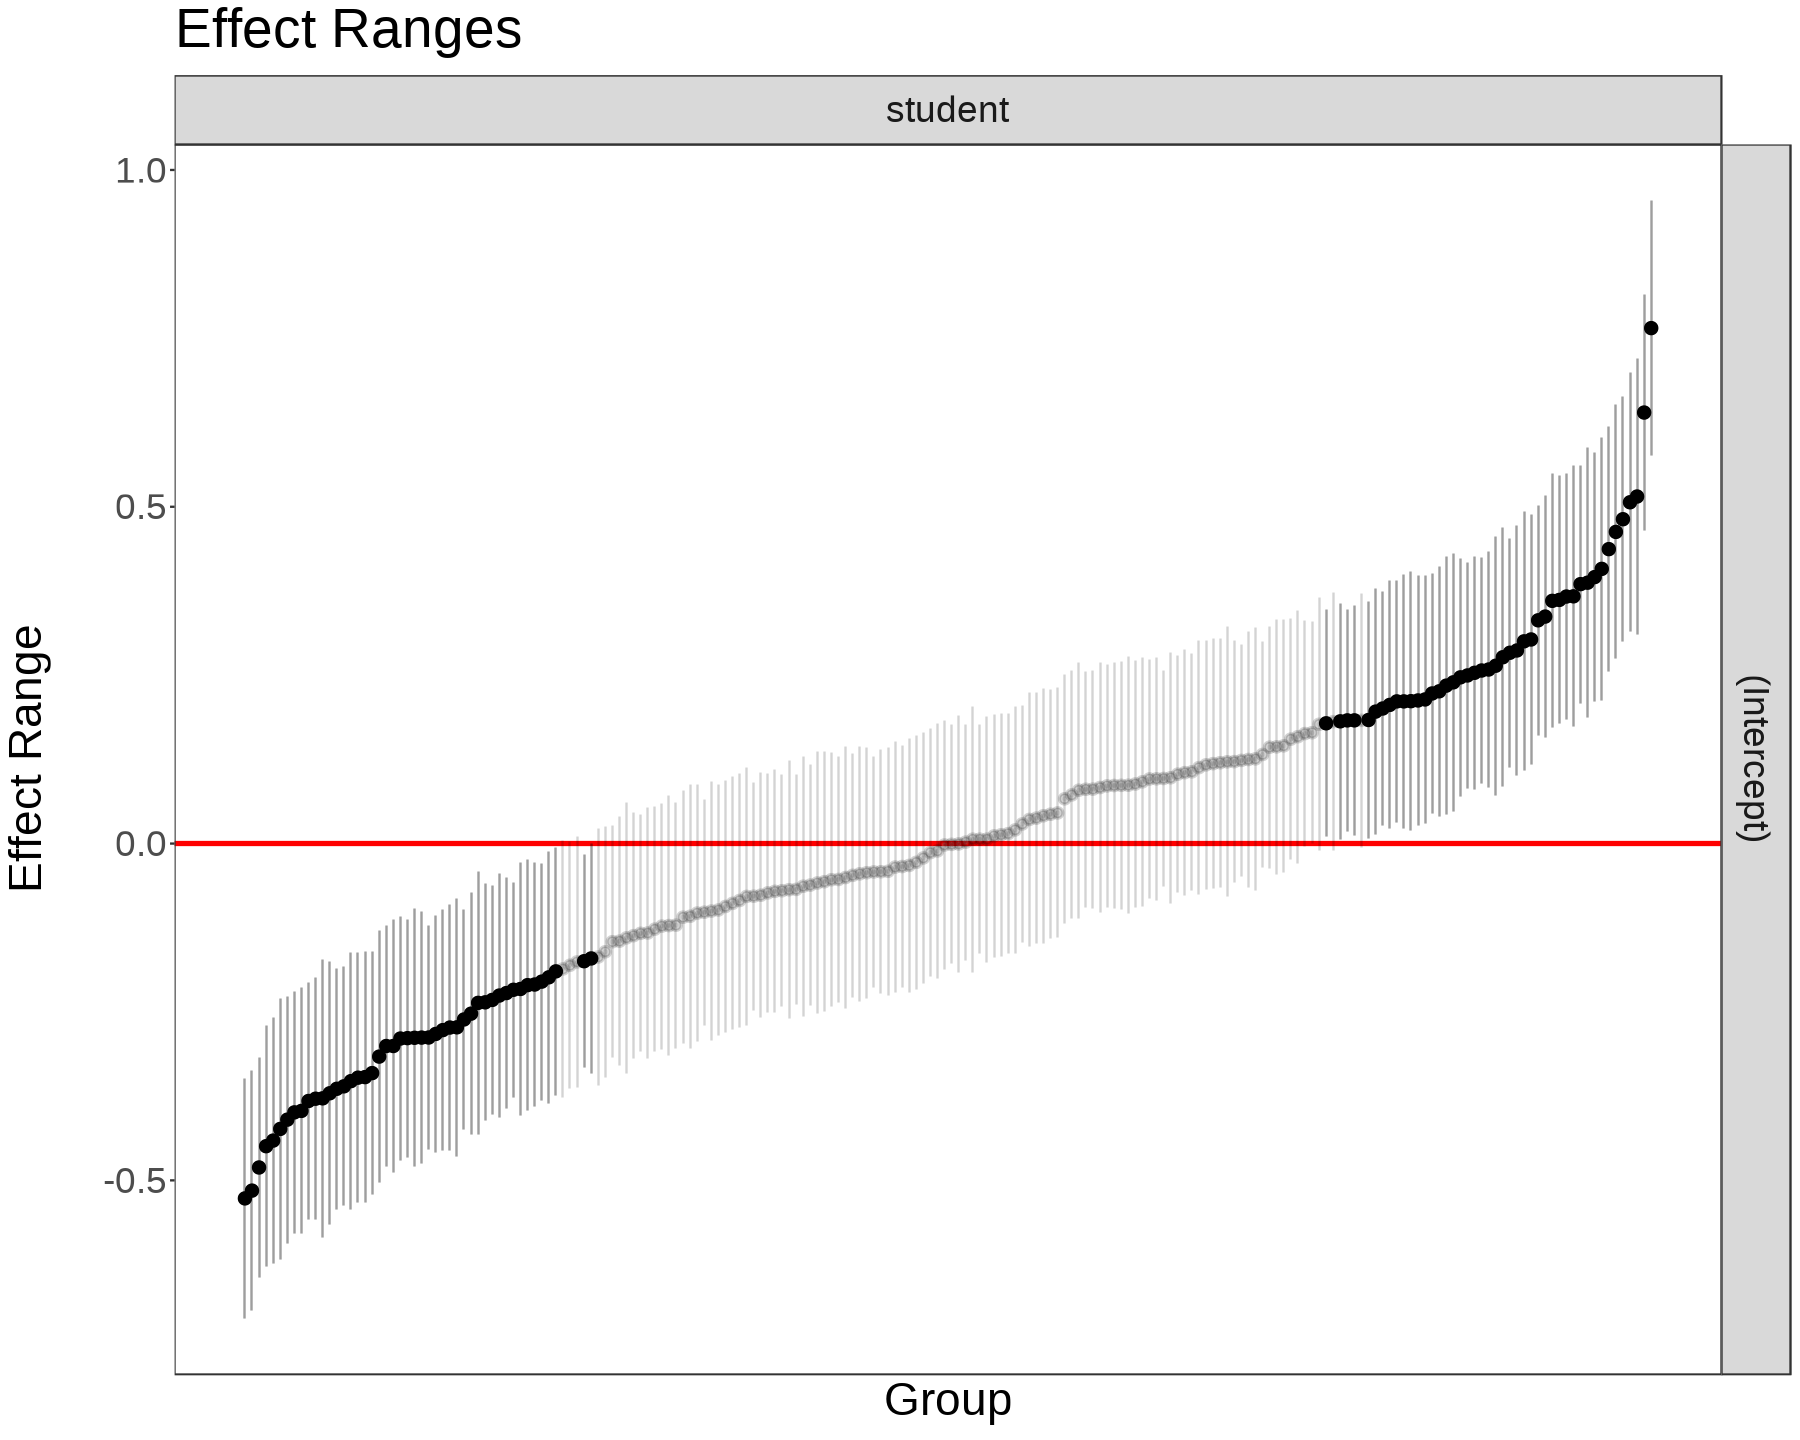

In [45]:
library(merTools)
library(future)
plan(multisession)

interval_gpa_mixed <- predictInterval(gpa_mixed)   # for various model predictions, possibly with new data

sim_gpa_mixed <- REsim(gpa_mixed)             # mean, median and sd of the random effect estimates

plotREsim(REsim(gpa_mixed))  # plot the interval estimate

In [44]:
## Predictions
predict_no_re_gpa <- predict(gpa_mixed, re.form = NA)
predict_lm_gpa <- predict(gpa_lm)
predict_with_re_gpa <- predict(gpa_mixed)

1        2        3        4        5        6 
2.599214 2.705529 2.811843 2.918157 3.024471 3.130786

### Sleep

For this exercise, we’ll use the sleep study data from the lme4 package. The following describes it.

    The average reaction time per day for subjects in a sleep deprivation study. On day 0 the subjects had their normal amount of sleep. Starting that night they were restricted to 3 hours of sleep per night. The observations represent the average reaction time (in milliseconds) on a series of tests given each day to each subject.

After loading the package;

1. Run a regression with Reaction as the target variable and Days as the predictor.
2. Run a mixed model with a random intercept for Subject.
3. Interpret the variance components and fixed effects.


In [46]:
data("sleepstudy")

ss_lm <- lm(Reaction ~ Days, data = sleepstudy)
ss_mixed <- lmer(Reaction ~ Days + (1 | Subject), data = sleepstudy)

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“semi-transparency is not supported on this device: reported only once per page”


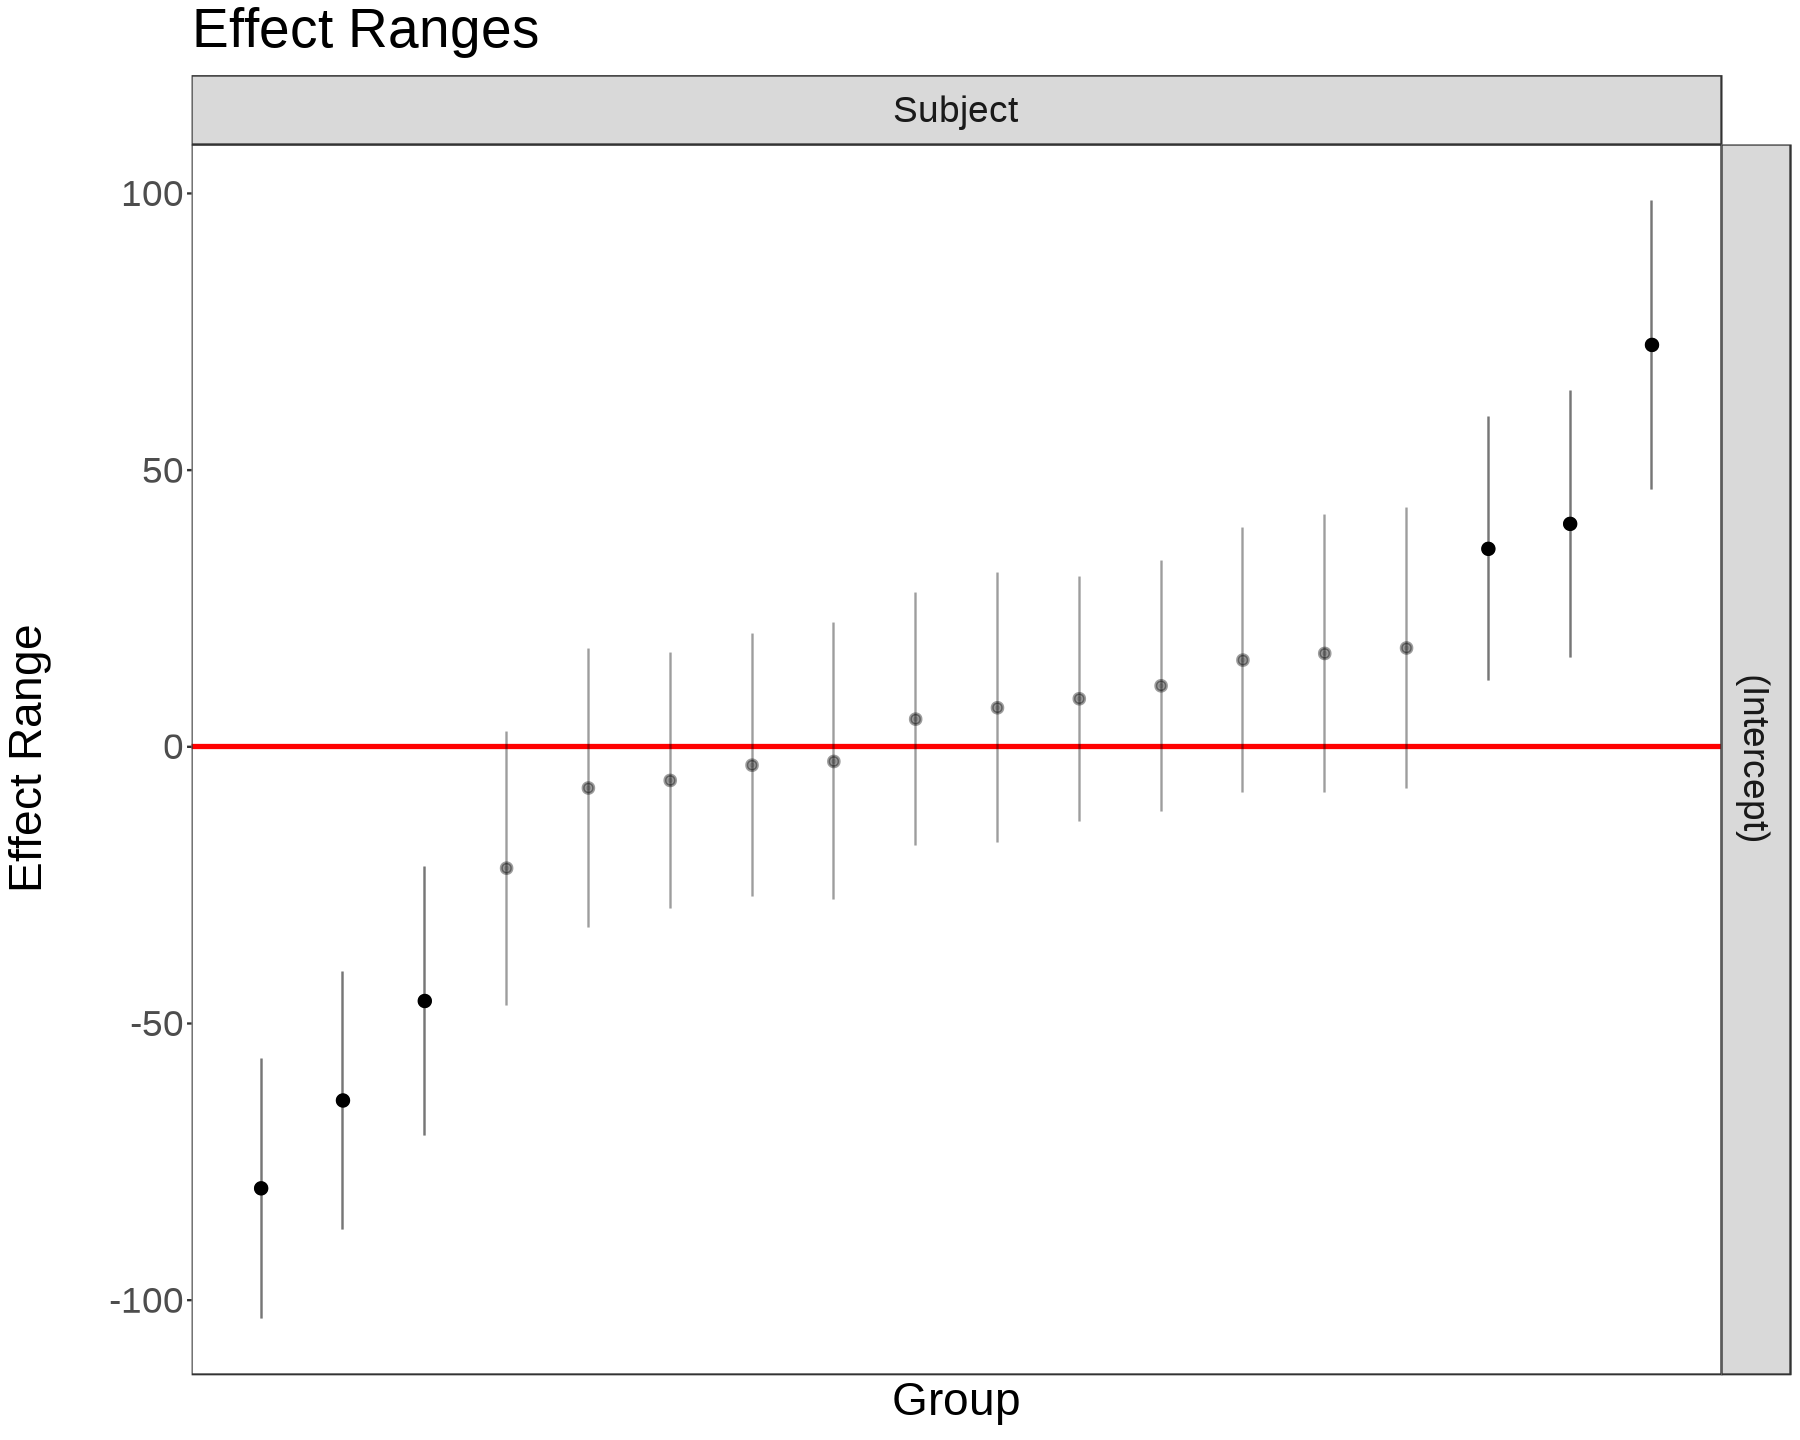

In [47]:
interval_ss_mixed <- predictInterval(ss_mixed)   # for various model predictions, possibly with new data
sim_ss_mixed <- REsim(ss_mixed)             # mean, median and sd of the random effect estimates
plotREsim(REsim(ss_mixed))

In [49]:
extract_fixed_effects(ss_mixed) %>%
  kable_df() %>% 
  toString() %>% 
  IRdisplay::display_html()

extract_vc(ss_mixed) %>%
  kable_df(align = 'lrr', digits = 3) %>%
  toString() %>%
  IRdisplay::display_html()

term,value,se,t,p_value,lower_2.5,upper_97.5
Intercept,251.405,9.747,25.794,0,232.302,270.508
Days,10.467,0.804,13.015,0,8.891,12.044


Computing profile confidence intervals ...



group,effect,variance,sd,sd_2.5,sd_97.5,var_prop
Subject,Intercept,1378.179,37.124,26.007,52.936,0.589
Residual,NA,960.457,30.991,27.814,34.591,0.411


### Adding the cluster-level covariate

Rerun the mixed model with the GPA data adding the cluster level covariate of sex, or high school GPA (highgpa), or both. Interpret all aspects of the results.

What happened to the student variance after adding cluster level covariates to the model?


In [50]:
gpa_high_mixed <- lmer(gpa ~ occasion + sex + (1 | student), data = gpa_data)
summary(gpa_high_mixed)

Linear mixed model fit by REML ['lmerMod']
Formula: gpa ~ occasion + sex + (1 | student)
   Data: gpa_data

REML criterion at convergence: 398.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.5725 -0.6394 -0.0089  0.6384  2.8870 

Random effects:
 Groups   Name        Variance Std.Dev.
 student  (Intercept) 0.05858  0.242   
 Residual             0.05809  0.241   
Number of obs: 1200, groups:  student, 200

Fixed effects:
             Estimate Std. Error t value
(Intercept)  2.669452   0.027456  97.225
occasion     0.106314   0.004074  26.096
sexmale     -0.147870   0.036996  -3.997

Correlation of Fixed Effects:
         (Intr) occasn
occasion -0.371       
sexmale  -0.640  0.000

In [51]:
gpa_high_mixed <- lmer(gpa ~ occasion + highgpa + (1 | student), data = gpa_data)
summary(gpa_high_mixed)

Linear mixed model fit by REML ['lmerMod']
Formula: gpa ~ occasion + highgpa + (1 | student)
   Data: gpa_data

REML criterion at convergence: 407.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.5759 -0.6306 -0.0097  0.6384  2.8158 

Random effects:
 Groups   Name        Variance Std.Dev.
 student  (Intercept) 0.06163  0.2483  
 Residual             0.05809  0.2410  
Number of obs: 1200, groups:  student, 200

Fixed effects:
            Estimate Std. Error t value
(Intercept) 2.351413   0.097265  24.175
occasion    0.106314   0.004074  26.096
highgpa     0.082946   0.031756   2.612

Correlation of Fixed Effects:
         (Intr) occasn
occasion -0.105       
highgpa  -0.975  0.000

In [52]:
gpa_high_mixed <- lmer(gpa ~ occasion + highgpa + sex + (1 | student), data = gpa_data)
summary(gpa_high_mixed)

Linear mixed model fit by REML ['lmerMod']
Formula: gpa ~ occasion + highgpa + sex + (1 | student)
   Data: gpa_data

REML criterion at convergence: 394.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.5186 -0.6307 -0.0132  0.6358  2.8742 

Random effects:
 Groups   Name        Variance Std.Dev.
 student  (Intercept) 0.05588  0.2364  
 Residual             0.05809  0.2410  
Number of obs: 1200, groups:  student, 200

Fixed effects:
             Estimate Std. Error t value
(Intercept)  2.397203   0.093914  25.525
occasion     0.106314   0.004074  26.096
highgpa      0.092392   0.030528   3.027
sexmale     -0.155812   0.036351  -4.286

Correlation of Fixed Effects:
         (Intr) occasn highgp
occasion -0.108              
highgpa  -0.958  0.000       
sexmale  -0.114  0.000 -0.072

### Simulating a mixed model

The following represents a simple way to simulate a random intercepts model. Note each object what each object is, and make sure the code make sense to you. Then run it.

In [74]:
set.seed(1234)  # this will allow you to exactly duplicate your result
Ngroups <- 50
NperGroup <- 3
N <- Ngroups * NperGroup
groups <- factor(rep(1:Ngroups, each = NperGroup))
u <- rnorm(Ngroups, sd = .5)
e <- rnorm(N, sd = .25)
x <- rnorm(N)
y <- 2 + .5 * x + u[groups] + e

d <- data.frame(x, y, groups)

Linear mixed model fit by REML ['lmerMod']
Formula: y ~ x + (1 | groups)
   Data: d

REML criterion at convergence: 134.8

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.34686 -0.58375 -0.03412  0.60040  2.05198 

Random effects:
 Groups   Name        Variance Std.Dev.
 groups   (Intercept) 0.22889  0.4784  
 Residual             0.05891  0.2427  
Number of obs: 150, groups:  groups, 50

Fixed effects:
            Estimate Std. Error t value
(Intercept)  1.79825    0.07055   25.49
x            0.44050    0.02585   17.04

Correlation of Fixed Effects:
  (Intr)
x -0.039

Computing profile confidence intervals ...



,2.5 %,97.5 %
.sig01,0.3856096,0.5923159
.sigma,0.2115769,0.2793373
(Intercept),1.6587640,1.9377754
x,0.3897753,0.4915561


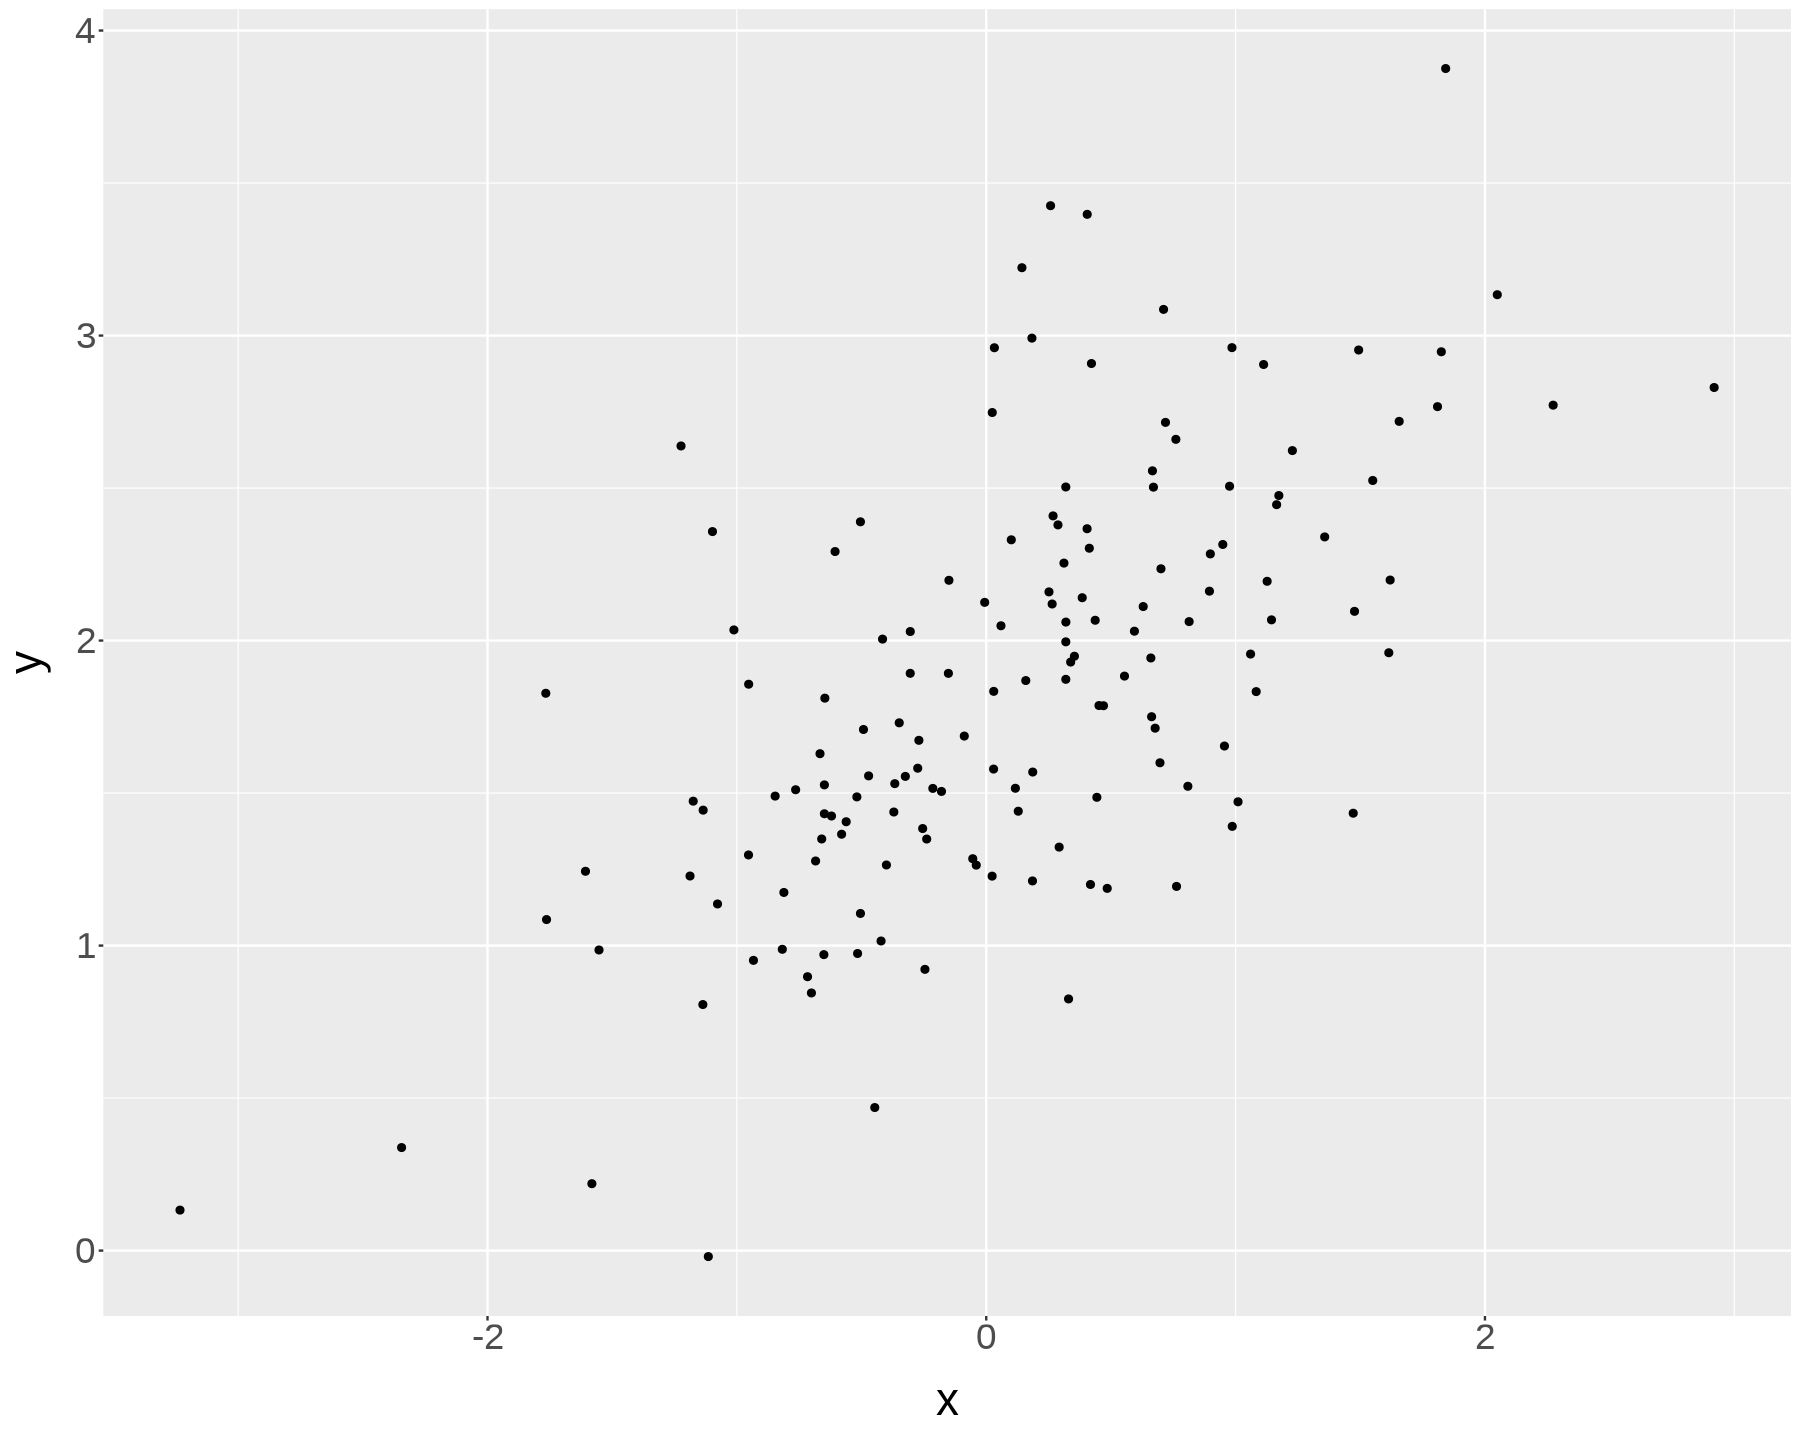

In [75]:
model <- lmer(y ~ x + (1|groups), data=d)

summary(model)

confint(model)

ggplot(aes(x, y), data=d) +
  geom_point()

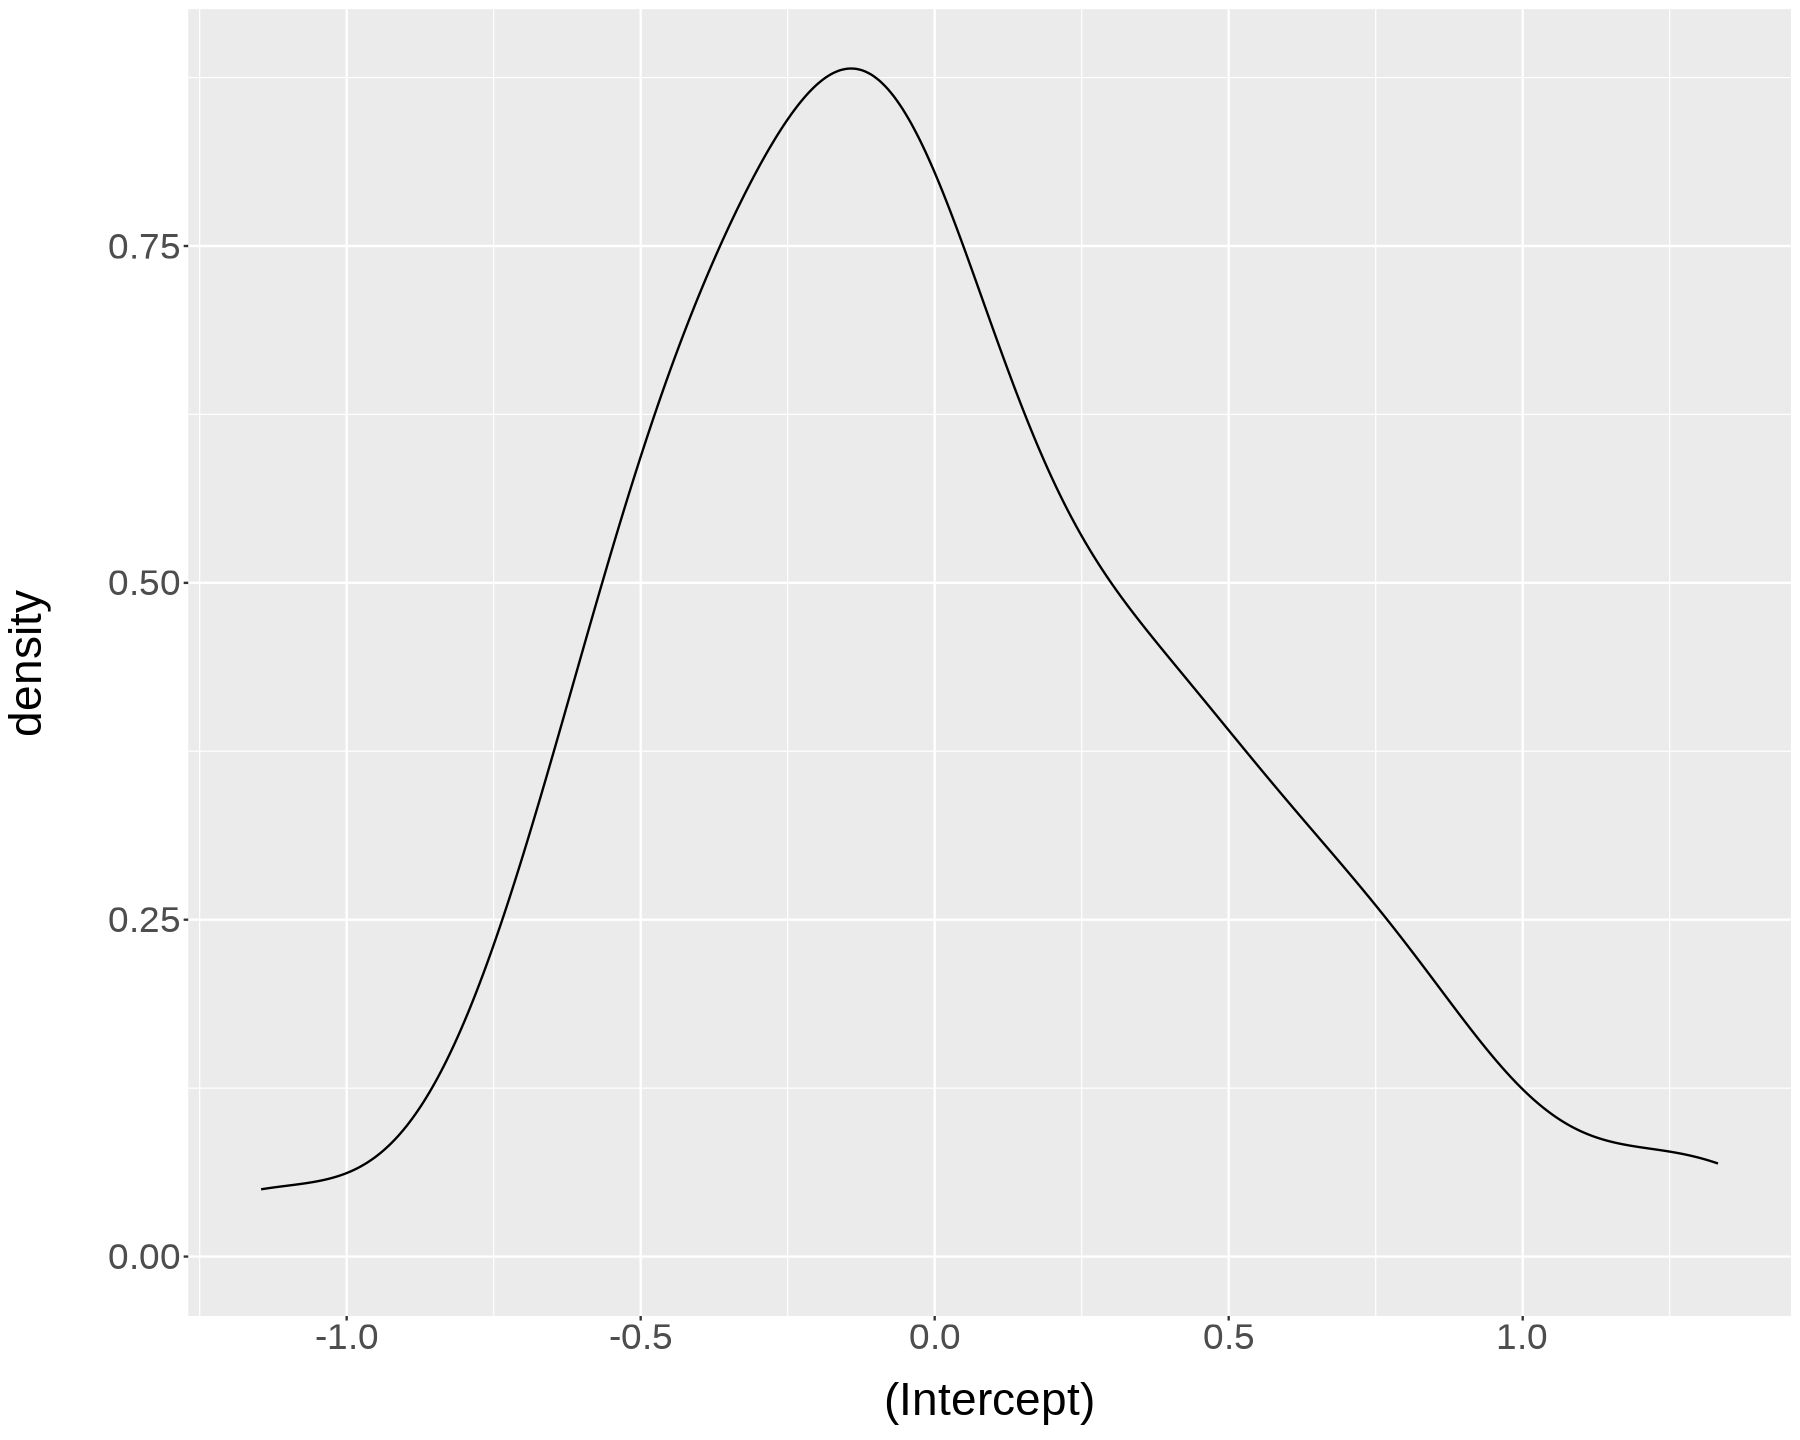

In [73]:
re <- ranef(model)$groups

re %>% ggplot(aes(x = `(Intercept)`)) +
  geom_density()
